# Introduction to Jupyter Notebooks and Julia

## Jupyter Notebooks
A Jupyter notebook allows cells of both markdown and code to place in series. These cells can be evaluated in turn.  Markdown cells can contain text and equations, for example,
$$
i\hbar\frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m}\nabla^2\psi + V\psi.
$$
Equations use the same syntax as in LaTeX.

Code cells can contain code of the language the notebook. In this case, we are using the Julia programming language, however notebooks with other programming languages (such as Python) are just as easily created.  Documentation for Jupyter can be found here http://jupyter.org/documentation.html.

## Julia

Julia is a scientific programming language, meaning it was created with ease of mathematical calculation in mind.

### Advantages

- Can be very fast (comparable to C).

- Relatively intuitive and simple syntax.

- Packages are easy to install and create.

- Can call code from other languages (ccall, pycall, rcall).

### Disadvantages

- Relatively new (since 2012), only hit release version 1.0 within the last few years.

- This means syntax has changed over time (so old code you find online may no longer work!).

- Number of available libraries not as large as other languages (eg Python).

- Main drive from the machine learning community (an advantage if you are looking for this!)

The documentation for Julia can be found here https://docs.julialang.org/en/v1/, with the Introducing Julia wikibook also being highly useful (and more accessible to those newer to programming) https://en.wikibooks.org/wiki/Introducing_Julia.


## Variables
Variables have different types, which can be explicitly set or are implied.  Below are some examples:

In [51]:
a = 2 # integer
b = 3.14 # float
c = 1+2im # complex integer
d = "text" # string, note we need double quotes
falsum = false # boolean

# now we check what types our variables are
println(typeof(a))
println(typeof(b))
println(typeof(c))
println(typeof(d))
println(typeof(falsum))

Int64
Float64
Complex{Int64}
String
Bool


## Scalar Arithmetic
The syntax for scalar arithmetic and logic operations in Julia is similar to what one might intuitively expect and other programming languages.

In [2]:
println(2+3) # addition
println(4*7) # multiplication
println(4/7) # division, (which is not integer division by default)
println(11%7) # remainder
println(3^5) # exponentiation
println(1//2+1//3) # addition of fractions

5
28
0.5714285714285714
4
243
5//6


In [3]:
F = false
T = true
println(~T) # logical NOT
println(T | F) # logical OR
println(T & F) # logical AND
println(xor(T,F)) # logical XOR

false
true
false
true


In [4]:
println(T!=T)
println(T==T)

false
true


In [5]:
complex = pi+1im
println(angle(complex)) # this gives the angle in radians
println(real(complex)) # real part of the complex number
println(imag(complex)) # imaginary part
println(abs(complex)) # magnitude of the complex number

0.30816907111598496
3.141592653589793
1.0
3.296908309475615


## Arrays

In [6]:
A = [1,2,3] # a 3x1 array
B = [4,5,6]
R = [2 7 1] # note without the commas we obtain a 1x3 array
println(B') # the ' sign indicates transpose
println(R')
println(R)

[4 5 6]
[2; 7; 1]
[2 7 1]


Note that Julia starts indexing at 1, so to access the first element of an array we use A[1].  Furthermore, unlike in other programming languages, the last element of a range a:b is included.

In [7]:
using LinearAlgebra # need this to use linear algebra operations

In [8]:
println(A+B) # addition
println(A.*B) # elementwise multiplication
println(dot(A,B)) # dot product
println(cross(A,B)) # cross product
println(A*B') # outer product, ' creates the transpose

[5, 7, 9]
[4, 10, 18]
32
[-3, 6, -3]
[4 5 6; 8 10 12; 12 15 18]


In [9]:
A'*B

32

## Matrices

A matrix in Julia is simply a two-dimensional array and is therefore manipulated in a similar fashion.  In Julia, the indices [i,j] for an array give element at row i and column j.  In terms of memory, elements in high-dimensional arrays are stored in a column-major order, meaning that the element [i,j+1] comes after [i,j] in memory.

In [10]:
M = [1 2 3; 4 5 6; 7 2 1] # semicolons separate the rows of the matrix

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  2  1

In [11]:
println(M[1,2]) # element at row 1, column 2
println(M[:,1]) # all the elements of column 1
println(M[1:2,:]) # elements 1 to 2 of each column
println(M[[1,3],:]) # rows 1 and 3
a = M[1,:]
a[end]

2
[1, 4, 7]
[1 2 3; 4 5 6]
[1 2 3; 7 2 1]


3

In [12]:
a

3-element Array{Int64,1}:
 1
 2
 3

In [13]:
println(det(M)) # determinant of the matrix
println(eigen(M)) # eigenvalues AND corresponding eigenvectors
@time inv(M) # inverse matrix

-11.999999999999993
Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}([-3.2759200865320106, 0.3697800564020407, 9.906140030129974], [0.38658145822035667 0.1920194451537996 0.33742559345206363; 0.41152710436089174 -0.834706705444582 0.8263985878255288; -0.825348543669014 0.516132975664875 0.4507874697942416])
  0.077379 seconds (187.47 k allocations: 9.828 MiB)


3×3 Array{Float64,2}:
  0.583333  -0.333333   0.25
 -3.16667    1.66667   -0.5
  2.25      -1.0        0.25

In [14]:
println(det(M)) # determinant of the matrix
println(eigen(M)) # eigenvalues AND corresponding eigenvectors
@time inv(M) # inverse matrix

-11.999999999999993
Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}([-3.2759200865320106, 0.3697800564020407, 9.906140030129974], [0.38658145822035667 0.1920194451537996 0.33742559345206363; 0.41152710436089174 -0.834706705444582 0.8263985878255288; -0.825348543669014 0.516132975664875 0.4507874697942416])
  0.000013 seconds (5 allocations: 2.109 KiB)


3×3 Array{Float64,2}:
  0.583333  -0.333333   0.25
 -3.16667    1.66667   -0.5
  2.25      -1.0        0.25

In [15]:
println(diag(M,0))

[1, 5, 1]


In [16]:
x = 3.5
y = ceil(x)
Int(y)

4

In [17]:
eps()

2.220446049250313e-16

## Exercise 1: Solve Ax=b

Solve the following system of equations,
$$
2\alpha+8\beta+\gamma+3\delta = 100 \\
\alpha+\beta+9\gamma+7\delta = 143 \\
4\alpha+9\beta+\gamma+5\delta = 111 \\
4\alpha+8\beta+8\gamma+2\delta = 264
$$

In [18]:
A = [2 8 1 3;1 1 9 7;4 9 1 5;4 8 8 2];
b= [100,143,111,264];

## Plotting
With our knowlege of arrays, we can now plot some graphs.  First we will have to load the plotting functions.  For that, you may need the plotting package, which can be added with Pkg.add("PyPlot").

In [19]:
using Pkg
Pkg.add("PyPlot") # adds a plotting package
Pkg.update() # updates all packages

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [==============>                          ]  34.

Fetching: [========================================>]  100.0 %

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Installed Parsers ─────── v2.0.5
  Installed Distributions ─ v0.25.17
Updating `~/.julia/environments/v1.5/Project.toml`
  [31c24e10] ↑ Distributions v0.25.16 ⇒ v0.25.17
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [31c24e10] ↑ Distributions v0.25.16 ⇒ v0.25.17
  [69de0a69] ↑ Parsers v2.0.4 ⇒ v2.0.5


In [20]:
using PyPlot

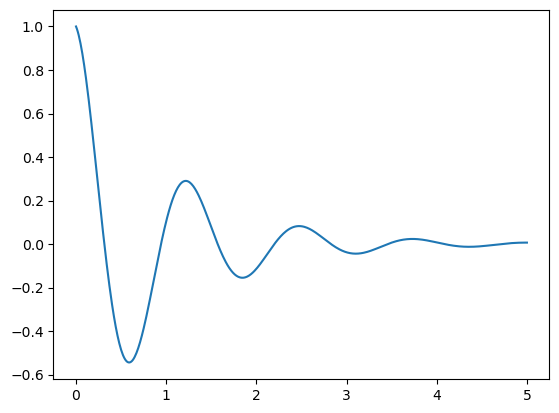

In [21]:
x = 0:0.01:5 # this object is called a range, its use is first:step:last
y = exp.(-x).*cos.(5*x) # note the dot multiplication between the exponential and the cosine

plot(x,y);

In [22]:
typeof(F1)

LoadError: [91mUndefVarError: F1 not defined[39m

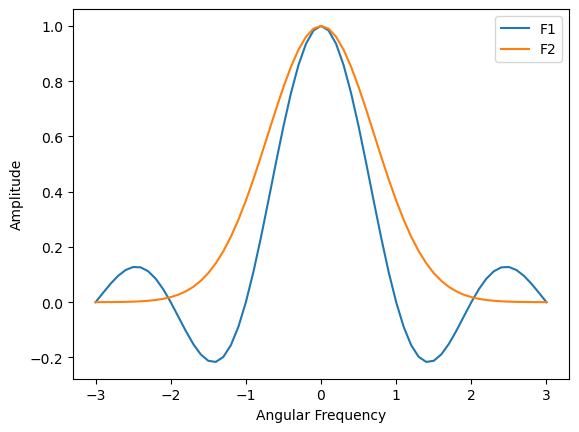

In [23]:
ω = -3:0.1:3
F1 = sinc.(ω)
F2 = exp.(-ω.^2)
plot(ω,F1,label="F1")
plot(ω,F2,label="F2")
xlabel("Angular Frequency")
ylabel("Amplitude")
legend();

## Functions

Functions are highly useful in any programming language.  In Julia, user-defined functions usually begin with the statement function and must be terminated with end, however functions can also be written in-line.

In [24]:
function test(a,b=7)
    println("The sum of $(a) and $(b) is $(a+b)")
    return a+b
end # you must end a function with end

f(x,a,b,c) = a*x^2+b*x+c

test(3)
println(f(10,1,2,1))

The sum of 3 and 7 is 10
121


Conditional statements have similar syntax as functions in that the condition must be terminated by end.  Loops also use similar syntax.

In [25]:
function odd_or_even(a)
    rem = a%2
    if rem == 0 # note the use of == rather than =
        println("$(a) is even")
    elseif rem == 1 # we could also just replace this with 'else'
        println("$(a) is odd")
    end
end

odd_or_even(101)

101 is odd


In [26]:
function cumulative_sum(array)
    total = 0
    for i=1:length(array)
        total += array[i]
    end
    return total
end

cumulative_sum([1,4,5,8,7])

25

In [27]:
function simple_ode(y0,t)
    # this function gives the numerical solution to the ODE dy/dt(t) = e^(-t) with initial condition y(0) = y0
    y = zeros(length(t)) # need solution output to be of the same size
    y[1] = y0
    dt = t[2]-t[1] # extract the timestep
    for i=2:length(t)
        y[i] = y[i-1]+dt*exp(-t[i])
    end
    return y
end

simple_ode (generic function with 1 method)

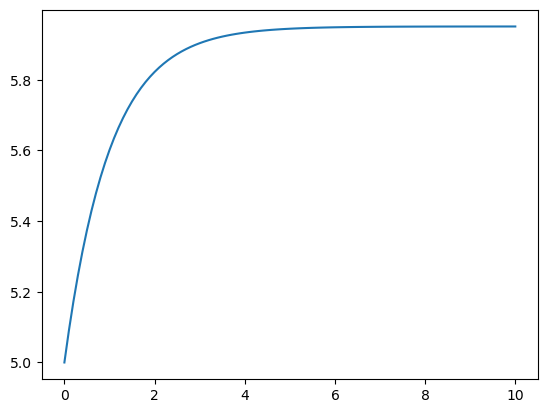

In [28]:
y0 = 5
t = 0:0.1:10
y = simple_ode(y0,t)
plot(t,y);

## Exercise 2: Lorenz Attractor

Visualise the trajectory,
$$
\frac{dx}{dt} = \sigma(y-x) \\
\frac{dy}{dt} = x(\rho-z) - y \\
\frac{dz}{dt} = xy-\beta z,
$$

for $x(0) = y(0) = z(0) = 1$, $t \in [0,100]$, $\sigma = 10$, $\rho = 28$ and $\beta = 8/3$.

To create 3-dimensional plots of a tracjetory, the plot3D(x,y,z) function can be used. Note: make your timestep small.

$math = \int_{some}^{the \; rest} numbers \: d\text{num}$

In [29]:
# reading a function from an external file
include("textExternalFunction.jl")

externalLorenzAttractor (generic function with 1 method)

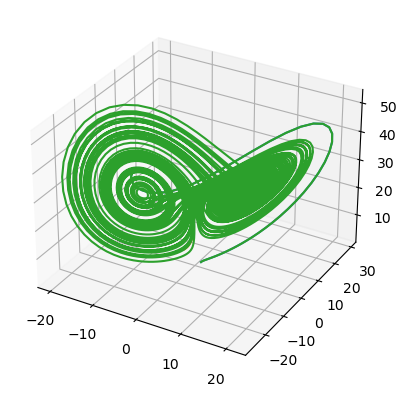

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f4dd980d850>

In [30]:
t = 0:0.01:100
x,y,z = externalLorenzAttractor([1,1,1],t,10,28,8/3); # (r0, t, σ, ρ, β)
plot3D(x[1:100],y[1:100],z[1:100])
plot3D(x[101:200],y[101:200],z[101:200])
plot3D(x,y,z)

## Pseudo-Random Number Generation

Random number generation is vital for stochastic simulations.  Pseudorandom numbers can be easily generated in Julia, and the seed can also be defined.  When we define the seed, this fixes the random numbers generated, allowing stochastic simulations to be replicated.

In [123]:
using Random
rand(3) # generates 3 uniform [0,1) random numbers

3-element Array{Float64,1}:
 0.8906790018143249
 0.9627724581231374
 0.18875569900112255

In [125]:
randn() # generates a normally distributed random number, with zero mean and unit variance

0.4298489501456081

In [101]:
Random.seed!(1000) # set the random seed
randn(4,4) # generate a 4x4 matrix of normally distributed random numbers

4×4 Array{Float64,2}:
 -1.55455   -0.0338454  -0.0957289  -0.120225
 -1.6934     1.05643     1.4864     -1.06746
  0.230284   0.186309   -0.808663    1.80549
  2.07773   -0.475462   -0.237713    0.349928

Notice what happens when the code blocks without the random seed are rerun and when the code block with the fixed random see is rerun.

In [160]:
n = ones(100)
randexp!(n) # here we have a predefined array and give each value an exponentially distributed random number

100-element Array{Float64,1}:
 2.162317317912223
 0.48164635725204563
 2.741670402012877
 0.6997893414460269
 1.0597669903963343
 0.010343937987528438
 3.1798834850747038
 1.692414452174458
 0.305989807980981
 2.193253101262486
 2.975825750762655
 0.018774560691176497
 0.15464549860519847
 ⋮
 0.39693716461038725
 1.2013113375580518
 0.28441053520773435
 1.0993755251428843
 2.5700153658059604
 1.574358514550945
 0.6635029008174561
 3.07074467634465
 0.9877041189741632
 3.8846091116761756
 0.19095291066265543
 0.8098439027299087

In built functions also exist for calculating summary statistics, such as the mean and the variance.

In [164]:
using Statistics
println(mean(n))
println(var(n))

1.2489524554021345
1.2038287501142149


In [166]:
a = 4
b = 5
counter = 0
if a < b 
    counter += 1
    println("inside")
end
print(counter)

inside
1

In [171]:
import Pkg; Pkg.add("Distributions")

In [170]:
Pkg.update()

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [172]:
using Distributions

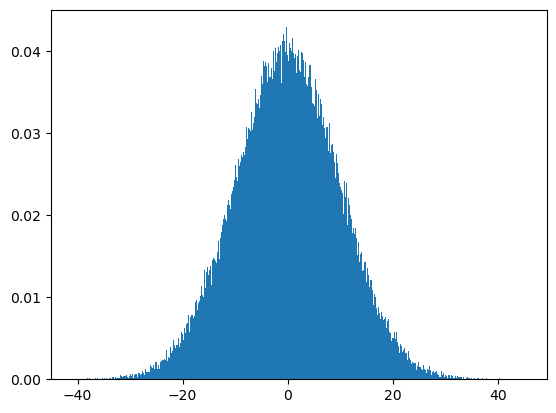

In [175]:
# https://juliastats.org/Distributions.jl/v0.14/starting.html
exMean = 0
exSd = 10
d=Normal(exMean,exSd);
x=rand(d,100000);
num_bins = 500;
hist(x, num_bins, density=true); # in python: plt.hist(...)

## Exercise 3: Estimate Pi

Estimate $\pi$ by generating random numbers.  Hint: generate x and y in the interval [0,1) and see how many of these satisfy $x^2+y^2 < 1$.

In [39]:
# Area of circle (radius 1) is pi
# Take x and y in [0,1) then area of quarter of circle is pi/4

## File Input/Output
Files can be saved and read using the dlmsave and dlmread functions.

In [177]:
using DelimitedFiles
Random.seed!(1000)
t = 1:1:100
x = rand(100)
y = x.^2
writedlm("test_numbers.txt",[t x y]) # this will save three columns of data, check your file by opening it

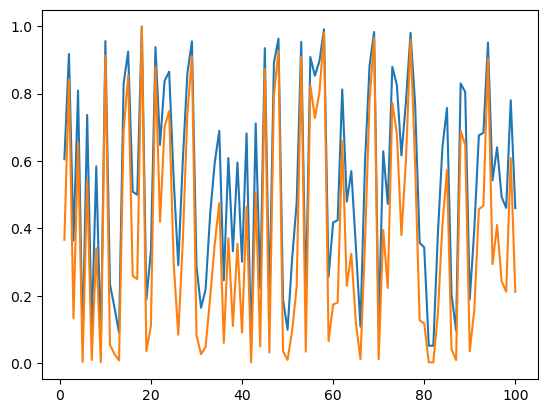

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4dd0a36690>

In [178]:
data = readdlm("test_numbers.txt")
T = data[:,1]
X = data[:,2]
Y = data[:,3]
plot(T,X)
plot(T,Y)

## Exercise 4: Ising Model

The Ising model was developed for ferromagnetism and is a simple model for looking at phase transitions.  Consider a lattice with $L$ sites, where each site $i$ has a spin $\sigma$ which can be -1 or +1,

$$
\sigma_i \in \{-1,+1\}.
$$

The energy of the system is given by,
$$
H(\sigma) = -J\sum_{i,j}\sigma_i\sigma_j,
$$
where we will only consider interactions between nearest neighbours $(i,j)$ to contribute to the energy of the system.  The spin of each site can change if it minimises the energy of the system.

The goal of this exercise is to create a simulation of the Ising model using a Metropolis-Hastings algorithm.  This algorithm has the following steps:

1 - Choose a site $i$ on the lattice randomly with probability $p$.

2 - Flip the state of site $i$ (multiply $\sigma_i$ by -1).

3 - If the new energy with the flipped site is lower than it was before, keep the site flipped.

4 - If the new energy is larger, keep the site flipped with probability $\exp[-\beta(H_{new}-H_{old}]$.

5 - Repeat steps 1-4 until the system reaches a steady state.

To give an example of how the energy is calculated, consider a lattice with $L=5$ with spins,
$$
\{-1,1,1,-1,1\}.
$$
Here the energy is $H = -[(-1\times 1)+(1\times 1)+(1\times -1)+(-1\times 1)] = -[-1+1-1-1] = 2$, where we have assumed $J=1$.

Areas to investigate:

a) How does the initial condition of the lattice change the final structure?  Try implementing a random initial condition as well.

b) How does the parameter $J$ qualitatively affect the lattice?  Try $J > 0 $ and $J < 0$.

c) How does the parameter $\beta$ qualitatively affect the lattice? Note $\beta > 0$.

d) Try a 2-d lattice in addition to a 1-d lattice.

e) Extract the final value of $H$ and plot how it varies with the two parameters.

## Advanced: Structs

A struct is a composite type, meaning that it is an object which can hold different objects which have different types.  They are useful for compactly holding a large set of values.

(For Python users, they are similar to classes.  However, with the exception of inner constructors, methods cannot be defined within the struct.)

In [42]:
struct Planet
    name::String
    mass::Float64 # in kilograms
    rad::Float64 # in metres
end
# note structs DO NOT like be redefined, if you need to change the definition in a jupyter notebook:
# either rename the struct (eg Planet2) or restart the kernel

In [43]:
earth = Planet("Earth",6.0e24,6.4e6) # this is how we define an object of composite type Planet

Planet("Earth", 6.0e24, 6.4e6)

In [44]:
# attributes of the struct are accessed with .
println(earth.name)
println(earth.mass)
println(earth.rad)

Earth
6.0e24
6.4e6


In [45]:
# what happens if we try to change the mass of the Earth?
earth.mass = 1.0

LoadError: [91msetfield! immutable struct of type Planet cannot be changed[39m

In [46]:
# what happens if we try to define a Planet which has types which do not correspont to our struct?
bizarro = Planet(false, 1, ['a','b'])

LoadError: [91mMethodError: [0mCannot `convert` an object of type [92mBool[39m[0m to an object of type [91mString[39m[39m
[91m[0mClosest candidates are:[39m
[91m[0m  convert(::Type{T}, [91m::T[39m) where T<:AbstractString at strings/basic.jl:229[39m
[91m[0m  convert(::Type{T}, [91m::AbstractString[39m) where T<:AbstractString at strings/basic.jl:230[39m
[91m[0m  convert(::Type{T}, [91m::PyCall.PyObject[39m) where T<:AbstractString at /home/user/.julia/packages/PyCall/BD546/src/conversions.jl:92[39m
[91m[0m  ...[39m

In [47]:
# let's create a function that uses the Planet struct
const G = 6.67e-11

function surface_gravity(p::Planet)
    return G*p.mass/p.rad^2
end

surface_gravity (generic function with 1 method)

In [48]:
surface_gravity(earth)

9.7705078125

In [49]:
# mutable structs allow their attributes to be changed
mutable struct Body
    m::Float64 # in kilograms
    x::Float64 # x position m
    y::Float64 # y position
    vx::Float64 # x velocity
    vy::Float64 # y velocity
end

## Exercise 5: Orbits

Given that the gravitational acceleration of two objects separated by a displacement vector $\vec{r}_{21} = \vec{r}_1-\vec{r}_2$ (with unit vector $\hat{r}_{21}$) is given by,

$ \vec{a}_{1} = -\frac{G m_2}{|\vec{r}_{21}|^2}\hat{r}_{21}$

create a simulation that generates the trajectories of the two-body problem.  You may find it helpful to use the Body struct, but you do not have to.  Since the acceleration depends entirely on position, Verlet integration is a useful and simple scheme to implement (https://en.wikipedia.org/wiki/Verlet_integration).  Use the parameters for the examples given first (A and B, then C and D), then experiment with your own parameters.

Areas to investigate:

a) What sets of parameters given stable orbits?

b) How would you implement the three-body problem?

In [50]:
A = Body(1/G,0.0,0.0,0.0,0.0)
B = Body(0.001/G,1.0,0.0,0.0,1.0)
C = Body(1/G,0.0,0.0,0.0,0.5)
D = Body(1/G,2.0,2.0,0.0,-0.5);